
# Predicting Subsciption Status of Mincecraft Players Based on the Hours Played and Age


### Intro

The data being utilized in the following report was collected by a team of researchers at the University of British Columbia, led by Frank Wood. The aim of collecting the data was to predict how people play video games (through various factors). The particular video game being played is Minecraft (which is an open world simulation game, in which players maneuver through a world made of blocks – they may encounter enemies, build large structures, or just adventure).<br>
<br>
The gathered data consists of 2 files:<br>
(a) a file containing a list of all unique players, which includes data about each player, and <br>
(b) a file containing a list of individual playing sessions, which includes data about each session. <br>
However, for the purpose of our report, we will only be utilizing the data from the players file. <br>

> The players dataset consists of the following columns: <br>
> 1. Experience
> 2. Subscription
> 3. Email (Hashed Form)
> 4. Hours Played
> 5. Name of Player
> 6. Gender of Player
> 7. Age of Player

For the purpose of this report, we will only be focusing on 3 of the columns. These three columns are Age, Hours Played, and Subscription. The reason for this is that we will use 2 columns with quantitative data (Age and Hours Played) to predict a categorical value in the Subscription column.

> **The Question we will be trying to Answer:** <br>
*Can the Age and Hours Played of a Player predict the said player's Subscription status?*

### Wrangling & Cleaning The Data

The following code loads the necessary libraries for data-analysis.

In [48]:
library(tidyverse)
library(digest)

Firstly, we will be loading the *players* dataset and storing it in a variable called *players*. This is done in the following code:

In [49]:
players <- read_csv("players.csv")

# Since the dataset is quite large, the head function shows the first few rows of data
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Next, to investigate our particular question (stated in the **Introduction** section), we will clean the data so that it only consists of the columns we desire for analysis. 

In [50]:
# We only require the subscribe, played_hours, and Age columns
players_cleaned <- players |> 
                select(subscribe, played_hours, Age)

head(players_cleaned)

subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


**An Important Note**
>After closely looking at the data, we realize that the *subscribe* column consists of either TRUE or FALSE values. This is categorical data, as it's separated into 2 categories: *TRUE or FALSE*. Therefore, we can convert this column to factor, to ensure that R treats it correctly in summaries, visualizations, modelling etc.

To do this, we need to first load the dplyr library, and then use the mutate function to change the subscribe column.

In [51]:
# Run this cell to load the dplyr library
library(dplyr)

We then mutate the column:

In [52]:
# Run the following cell to convert subscribe to factor through mutation
players_mutated <- players_cleaned |>
        mutate(subscribe = as.factor(subscribe))

head(players_mutated)

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


### Creating Initial Visualizations

Before we can perform any data analysis, we need to create some initial visualizations to see if we can spot any trends in the data. To do this, we can create an array of plots that can help us better understand that data.

> **(1)** Visualizing Boxplots for the data:

**Boxplot for Age by Subscription Status**

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


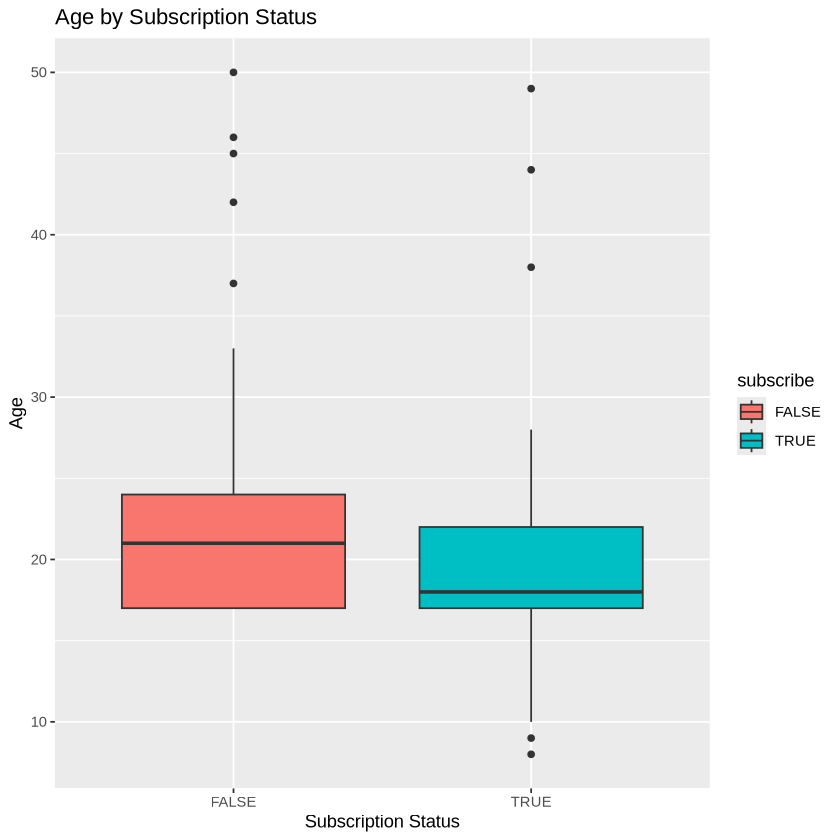

In [53]:
boxplot_age <- ggplot(players_mutated, aes(x = subscribe, y = Age, fill = subscribe)) + 
            geom_boxplot() + 
            labs(title = "Age by Subscription Status", x = "Subscription Status", y = "Age")

boxplot_age

This boxplot tells us that when we plot Age by Subscription status, the median age of non-subscribed players is higher. Furthermore, we can spot that both the categories have outliers. However, the subscribed category is the only category with young outliers in the age range of 5 to 10. This indicates that younger players might have a higher liklihood of being subscribed.

**Boxplot for Played Hours by Subscription Status**

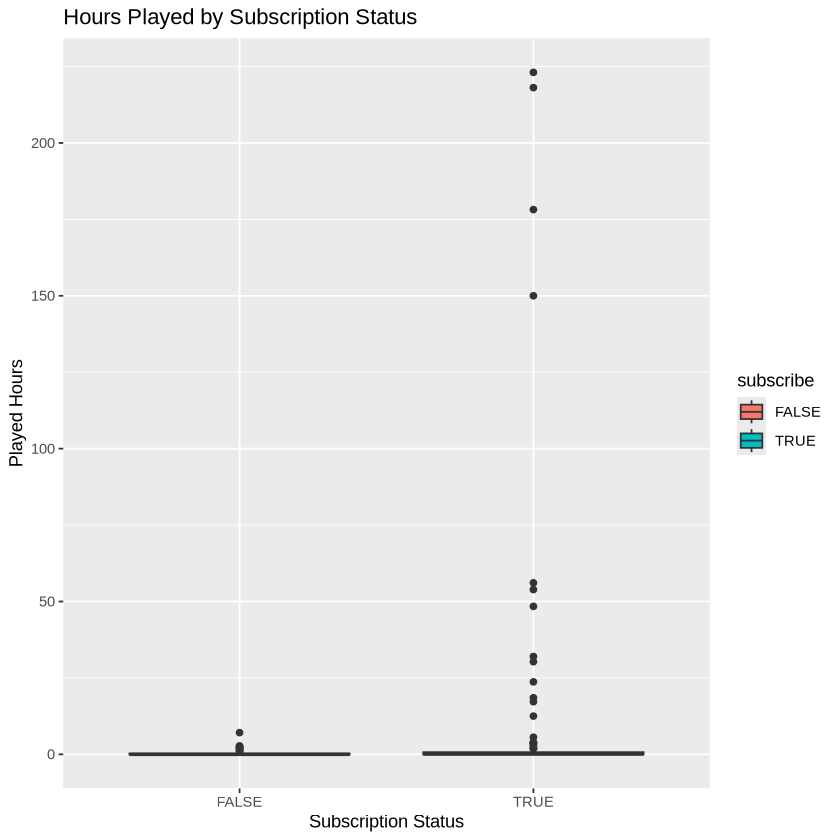

In [55]:
boxplot_hours_played <- ggplot(players_mutated, aes(x = subscribe, y = played_hours, fill = subscribe)) + 
                    geom_boxplot() + 
                    labs(title = "Hours Played by Subscription Status", x = "Subscription Status", y = "Played Hours")

boxplot_hours_played

We can see that plotting a boxplot for Hours Played by Subscription status doesn't tell us much, except for the fact that most players dont play for a long time. Other than that, it tells us that Subscribed Players tend to play a greater number of hours. To better visualize this relationship, we can apply logarithmic scaling to the y-axis.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


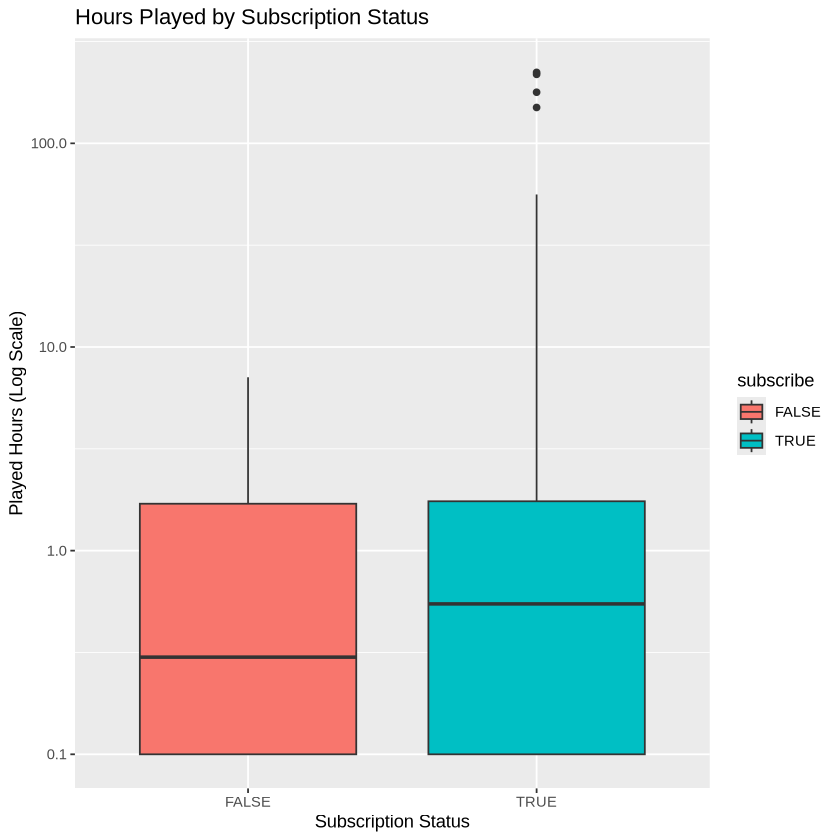

In [56]:
boxplot_hours_played_scaled <- ggplot(players_mutated, aes(x = subscribe, y = played_hours, fill = subscribe)) + 
                            geom_boxplot() + 
                            scale_y_log10() +  # Apply log scale to the y-axis
                            labs(title = "Hours Played by Subscription Status", x = "Subscription Status", y = "Played Hours (Log Scale)")

boxplot_hours_played_scaled

This makes the visualization easier to interpret, yet it still provides us with the same information. 